#EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Air quality/data.csv')



In [ ]:
# Delete the first 4 columns and the last column
df = df.iloc[:, 4:]



In [ ]:
# Display the first few rows of the updated DataFrame to verify changes
print(df.head())


   so2   no2  rspm  spm  pm2_5    SOi     Noi  Rpi  SPMi     AQI AQI_Range
0  4.8  17.4   0.0  0.0    0.0  6.000  21.750  0.0   0.0  21.750      Good
1  3.1   7.0   0.0  0.0    0.0  3.875   8.750  0.0   0.0   8.750      Good
2  6.2  28.5   0.0  0.0    0.0  7.750  35.625  0.0   0.0  35.625      Good
3  6.3  14.7   0.0  0.0    0.0  7.875  18.375  0.0   0.0  18.375      Good
4  4.7   7.5   0.0  0.0    0.0  5.875   9.375  0.0   0.0   9.375      Good


In [ ]:

# Conduct an Exploratory Data Analysis (EDA) on the remaining data

# Descriptive statistics
print(df.describe())


                 so2            no2           rspm            spm  \
count  435742.000000  435742.000000  435742.000000  435742.000000   
mean        9.968364      24.848119      98.786766     100.503296   
std        11.116635      18.801635      77.979702     150.074247   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.000000      13.000000      47.000000       0.000000   
50%         7.183333      21.000000      83.000000       0.000000   
75%        13.000000      32.000000     135.000000     172.000000   
max       909.000000     876.000000    6307.033333    3380.000000   

               pm2_5            SOi            Noi       Rpi           SPMi  \
count  435742.000000  435742.000000  435742.000000  435742.0  435742.000000   
mean        0.871919      12.361707      30.941921       0.0      85.233420   
std         7.424595      12.433975      22.659701       0.0     120.703402   
min         0.000000       0.000000       0.000000       0.0  

In [ ]:

# Check for missing values
print(df.isnull().sum())


so2          0
no2          0
rspm         0
spm          0
pm2_5        0
SOi          0
Noi          0
Rpi          0
SPMi         0
AQI          0
AQI_Range    0
dtype: int64


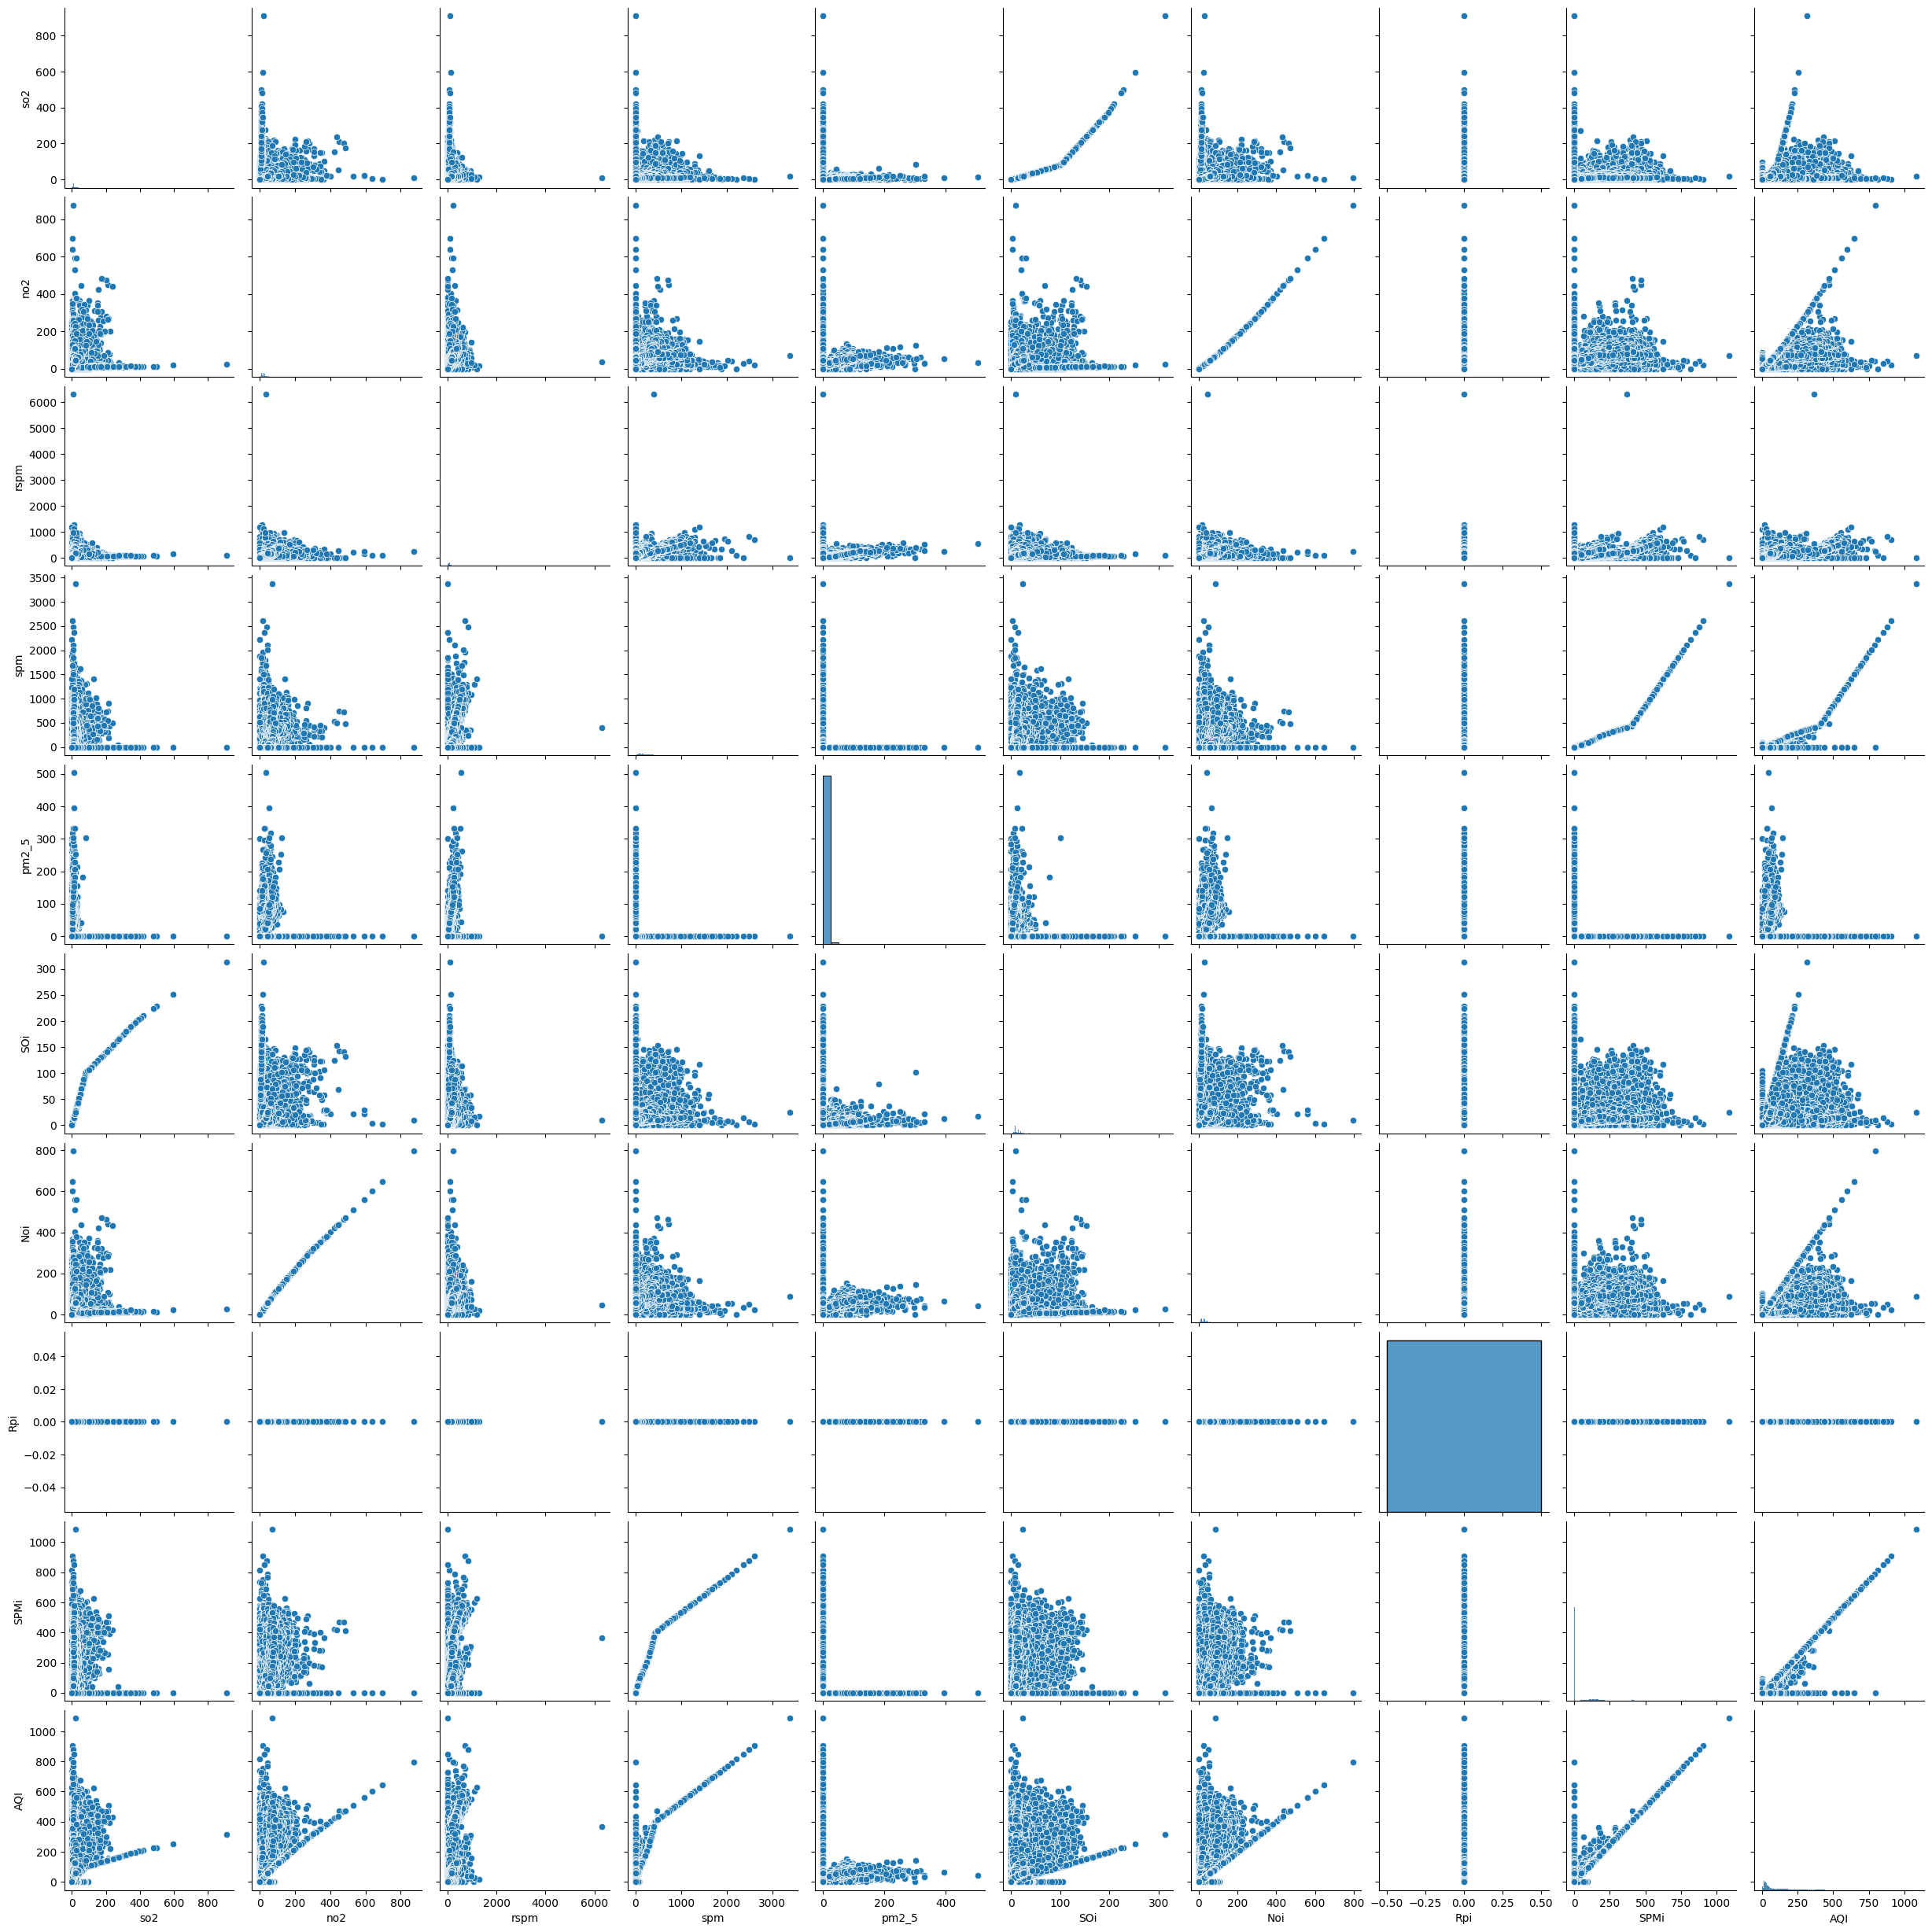

In [ ]:

# Pairplot to visualize relationships and distributions
sns.pairplot(df)
plt.show()


<ipython-input-8-bccf05f99fd8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


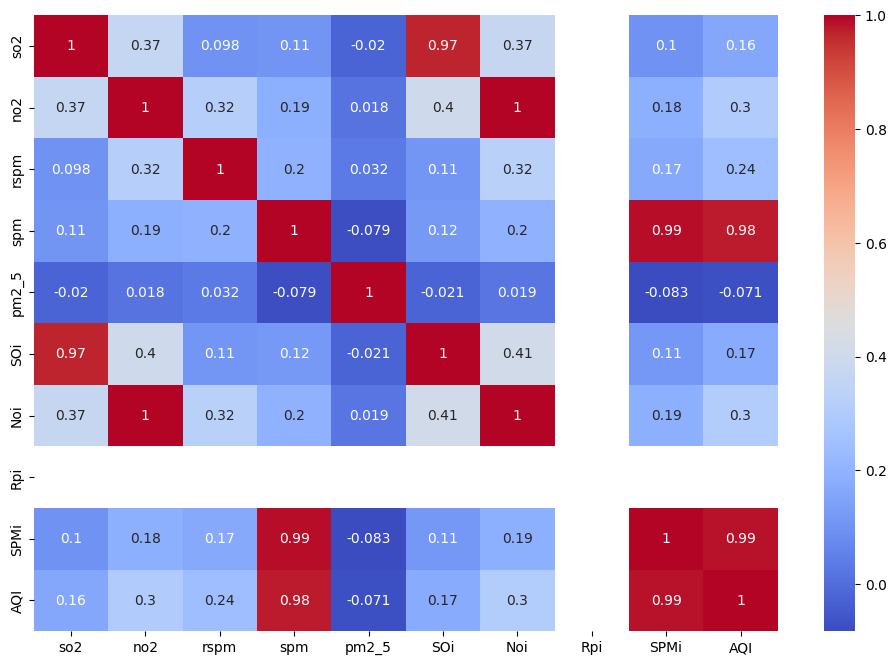

In [ ]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


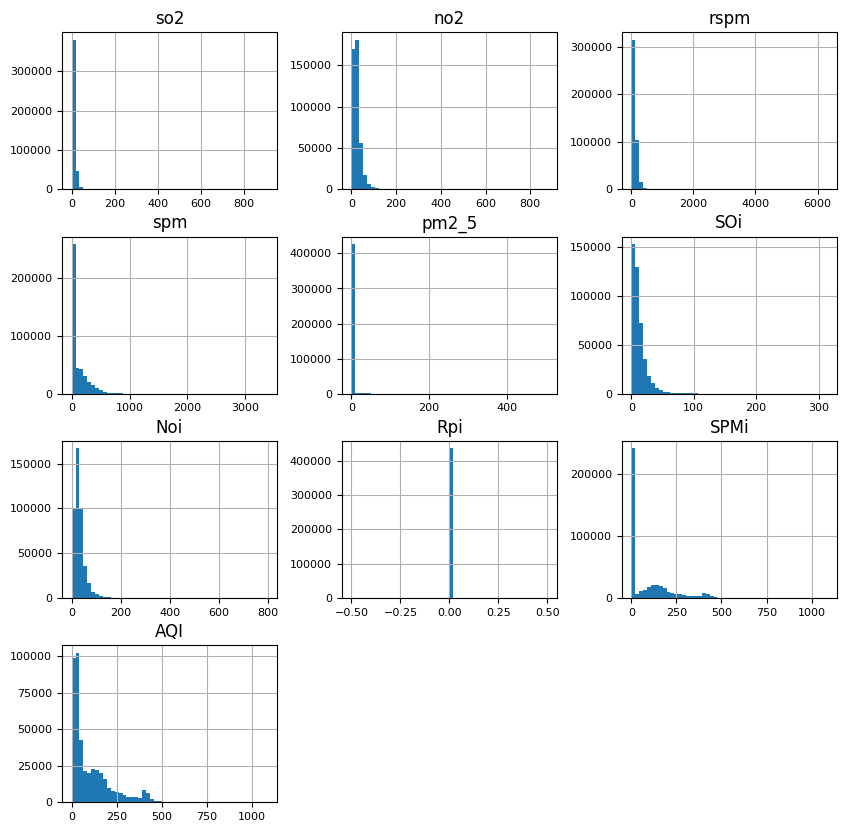

In [ ]:

# Histograms for each variable
df.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

#ML

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
import pickle
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
# Create a label encoder object



# Load data from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Air quality/data.csv')

# Delete the first 4 columns and the last column
df = df.iloc[:, 4:]

# Convert 'AQI_Range' to categorical
df['AQI_Range'] = df['AQI_Range'].astype('category')

# For saving the models and their confusion matrix
model_path = '/content/drive/MyDrive/Air quality/'

# Classification models
# Split into predictors and target


# List of models
models = [
    ['KNN', KNeighborsClassifier()],
    ['Random Forest', RandomForestClassifier()],
    ['GaussianNB', GaussianNB()],
    ['Decision Tree', DecisionTreeClassifier()],
    ['SVC', SVC()]
]

# Loop through the models list
for name, model in models:
    label_encoder = LabelEncoder()
    X_class = df.drop(['AQI', 'AQI_Range'], axis=1)
    y_class = df['AQI_Range']

    # Split into train and test sets
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
    # Fit the model
    model.fit(X_train_class, y_train_class)
    label_encoder.fit(y_train_class)
    # Predict on the test set
    y_pred_class = model.predict(X_test_class)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f'{name} Accuracy: {accuracy}')
    y_test_class = label_encoder.transform(y_test_class)
    y_pred_class = label_encoder.transform(y_pred_class)
    # Calculate evaluation metrics for classification
    r2 = r2_score(y_test_class, y_pred_class)
    mse = mean_squared_error(y_test_class, y_pred_class)
    mae = mean_absolute_error(y_test_class, y_pred_class)
    print(f'{name} R-squared: {r2}')
    print(f'{name} Mean Squared Error: {mse}')
    print(f'{name} Mean Absolute Error: {mae}')

    # Generate and save confusion matrix plot
    sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True)
    plt.title(f'{name} Confusion Matrix')
    plt.savefig(os.path.join(model_path, f'{name}_confusion_matrix.png'))
    plt.clf()  # Clear the figure for the next loop

    # Save the model
    with open(os.path.join(model_path, f'{name}_model.pkl'), 'wb') as f:
        pickle.dump(model, f)

# Regression models
# Split into predictors and target
X_reg = df.drop(['AQI', 'AQI_Range'], axis=1)
y_reg = df['AQI']

# Split into train and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_models = [
    ['Gradient Boosting Regressor', GradientBoostingRegressor()],
    ['Lasso', Lasso()],
    ['MLP Regressor', MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000)]
]

# Loop through the regression models list
for name, model in reg_models:
    # Fit the model
    model.fit(X_train_reg, y_train_reg)
    
    # Predict on the test set
    y_pred_reg = model.predict(X_test_reg)
    
    # Calculate evaluation metrics for regression
    r2 = r2_score(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    print(f'{name} R-squared: {r2}')
    print(f'{name} Mean Squared Error: {mse}')
    print(f'{name} Mean Absolute Error: {mae}')

    # Save the model
    with open(os.path.join(model_path, f'{name}_model.pkl'), 'wb') as f:
        pickle.dump(model, f)


KNN Accuracy: 0.9931381886194908
KNN R-squared: 0.9899883892162338
KNN Mean Squared Error: 0.02532444434244799
KNN Mean Absolute Error: 0.011623770783371009
Random Forest Accuracy: 0.9997590333796142
Random Forest R-squared: 0.999605342030726
Random Forest Mean Squared Error: 0.0009982902844553581
Random Forest Mean Absolute Error: 0.0004475094378592984
GaussianNB Accuracy: 0.8473419086851255
GaussianNB R-squared: 0.8710557152113475
GaussianNB Mean Squared Error: 0.32616553259360404
GaussianNB Mean Absolute Error: 0.2073575141424457
Decision Tree Accuracy: 0.9997819825815557
Decision Tree R-squared: 0.999696068000674
Decision Tree Mean Squared Error: 0.0007687982650403332
Decision Tree Mean Absolute Error: 0.00040161103397629347
SVC Accuracy: 0.9927939505903682
SVC R-squared: 0.9892761903521416
SVC Mean Squared Error: 0.027125956694855936
SVC Mean Absolute Error: 0.01328758792412994
Gradient Boosting Regressor R-squared: 0.9994771150083673
Gradient Boosting Regressor Mean Squared Error

<Figure size 640x480 with 0 Axes>

#APPLICATION

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!pip install -q streamlit

In [23]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import os
import base64
def add_bg_from_local(image_file):
    with open(image_file, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
    st.markdown(
    f"""
    <style>
    .stApp {{
        background-image: url(data:image/{"png"};base64,{encoded_string.decode()});
        background-size: cover
    }}
    </style>
    """,
    unsafe_allow_html=True
    )
add_bg_from_local('/content/drive/MyDrive/Air quality/bg.jpg')
# Set the title of the web app
st.title('Air Quality Index')

# Path to the models and matrices
model_directory = '/content/drive/MyDrive/Air quality'

# Load the saved models
classification_models = [f for f in os.listdir(model_directory) if f.endswith('_model.pkl') and 'Regressor' not in f and 'Lasso' not in f and 'MLP' not in f]
regression_models = [f for f in os.listdir(model_directory) if f.endswith('_model.pkl') and ('Regressor' in f or 'Lasso' in f or 'MLP' in f)]

# Create a select box for the classification models
classification_model_name = st.selectbox(
    'Select a classification model:',
    classification_models
)

# Create a select box for the regression models
regression_model_name = st.selectbox(
    'Select a regression model:',
    regression_models
)

# Get user input for the features
so2 = st.number_input('Enter sulphur dioxide concentration(SO2)', format='%.2f')
no2 = st.number_input('Enter Nitrogen dioxide concentration (NO2)', format='%.2f')
rspm = st.number_input('Enter Respirable suspended particualte matter concentration (RSPM)', format='%.2f')
spm = st.number_input('Enter suspended particulate matter(SPM)', format='%.2f')
pm2_5 = st.number_input('Enter particulate matter 2.5(PM2.5)', format='%.2f')
SOi = st.number_input('Enter SOi Value', format='%.2f')
Noi = st.number_input('Enter Noi Value', format='%.2f')
Rpi = st.number_input('Enter Rpi Value', format='%.2f')
SPMi = st.number_input('Enter SPMi Value', format='%.2f')

# Create a DataFrame from the user input
input_df = pd.DataFrame([[so2, no2, rspm, spm, pm2_5, SOi, Noi, Rpi, SPMi]], columns=['so2', 'no2', 'rspm', 'spm', 'pm2_5', 'SOi', 'Noi', 'Rpi', 'SPMi'])

if st.button('Predict'):
    # Load and use the selected classification model
    with open(os.path.join(model_directory, classification_model_name), 'rb') as f:
        classification_model = pickle.load(f)

    # Predict the AQI_Range
    AQI_Range_pred = classification_model.predict(input_df)
    st.write(f'Predicted AQI Range: {AQI_Range_pred[0]}')

    # Load and display the confusion matrix
    matrix_name = classification_model_name.replace('_model.pkl', '_confusion_matrix.png')
    matrix_path = os.path.join(model_directory, matrix_name)
    if os.path.exists(matrix_path):
        st.image(matrix_path, caption='Confusion Matrix')
    else:
        st.write('No confusion matrix found for this model.')

    # Load and use the selected regression model
    with open(os.path.join(model_directory, regression_model_name), 'rb') as f:
        regression_model = pickle.load(f)

    # Predict the AQI
    AQI_pred = regression_model.predict(input_df)
    st.write(f'Predicted AQI: {AQI_pred[0]}')


Overwriting app.py


In [24]:
!curl https://ipv4.icanhazip.com

35.243.245.50


In [26]:
!npm install localtunnel
!streamlit run /content/app.py &>/content/logs.txt &
!npx localtunnel --port 8501

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.567s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities

npx: installed 22 in 2.408s
your url is: https://tangy-islands-enjoy.loca.lt
^C
